<a href="https://colab.research.google.com/github/ravichandranNa/AJ_ML_Library/blob/master/AVHEALTHHACK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital. 

##This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.

##Suppose you have been hired as Data Scientist of HealthMan – a not for profit organization dedicated to manage the functioning of Hospitals in a professional and optimal manner.
##The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

##In the current COVID 19 situation, it's pretty clear that a picture has emerged,and that is increasing risk and uncertainty.That's really the driver that seems to be the influencer in money getting in the space for lower hanging fruit.Humans are hard-wired to flee from uncertainty,even more than risk. And what I mean by uncertainty is the unknown unknowns. In other words, I don't know the distribution here, I'm not comfortable with that. And that's a very important aspect to keep in mind, particularly in biomedicine. People don't like risk, but they absolutely hate uncertainty. And so when we think about what's going on in the biomedical field, we have to ask ourselves-- how much certainty do we have? And do breakthroughs-- perhaps, in some cases--create uncertainty on top of risk?



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv('/content/drive/My Drive/healthhackav/train.csv')
test = pd.read_csv('/content/drive/My Drive/healthhackav/test.csv')

In [ ]:
train.shape

(318438, 18)

In [ ]:
test.shape

(137057, 17)

In [ ]:
train.head(7)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449,0-10
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167,0-10


In [ ]:
train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [ ]:
def change_dtype(c):
    c['Hospital_code'] = c['Hospital_code'].astype('object')
    c['City_Code_Hospital'] = c['City_Code_Hospital'].astype('object')
    c['Bed Grade'] = c['Bed Grade'].astype('object')
    c['City_Code_Patient'] = c['City_Code_Patient'].astype('object')

change_dtype(train)
change_dtype(test)

In [ ]:
train.dtypes

case_id                               int64
Hospital_code                        object
Hospital_type_code                   object
City_Code_Hospital                   object
Hospital_region_code                 object
Available Extra Rooms in Hospital     int64
Department                           object
Ward_Type                            object
Ward_Facility_Code                   object
Bed Grade                            object
patientid                             int64
City_Code_Patient                    object
Type of Admission                    object
Severity of Illness                  object
Visitors with Patient                 int64
Age                                  object
Admission_Deposit                     int64
Stay                                 object
dtype: object

In [ ]:
train.nunique()

case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     10
dtype: int64

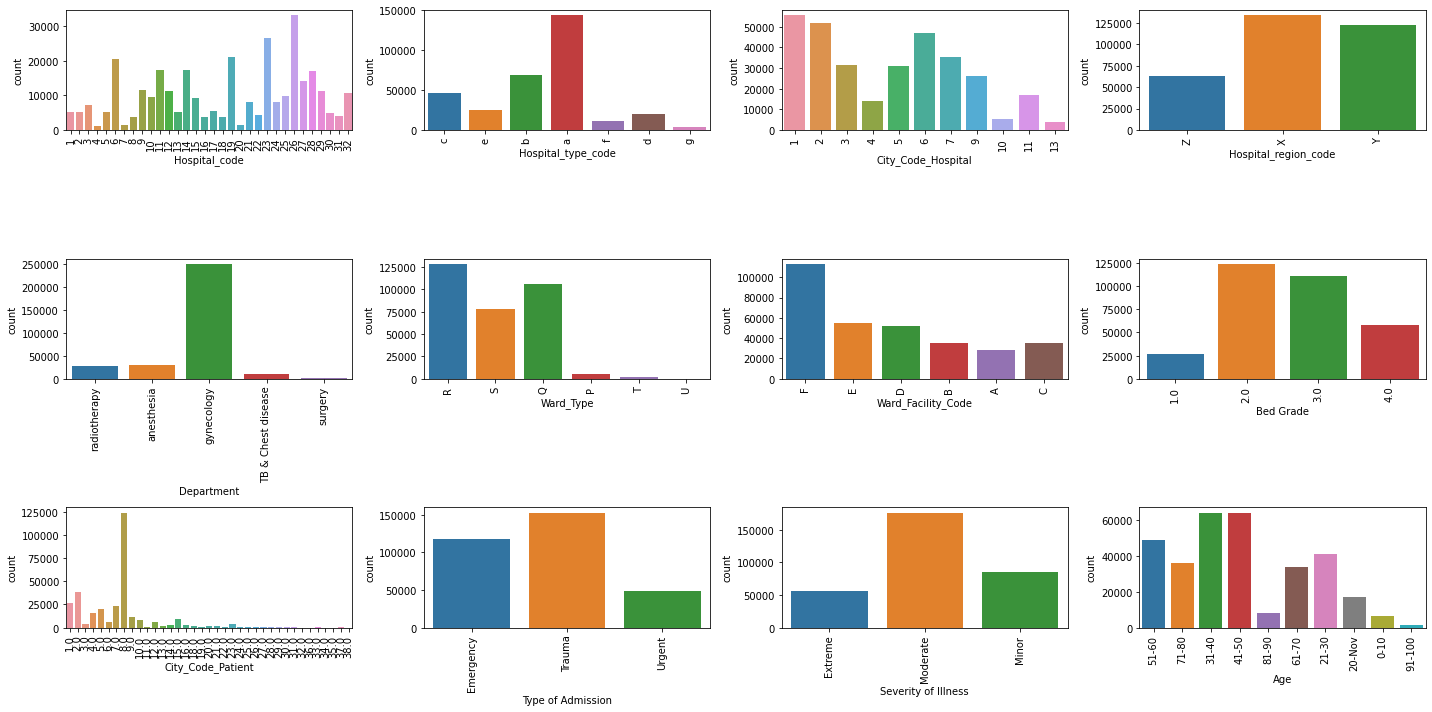

In [ ]:
categorical = train.select_dtypes(include=[object])
fig, ax = plt.subplots(3,4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
    
plt.tight_layout()

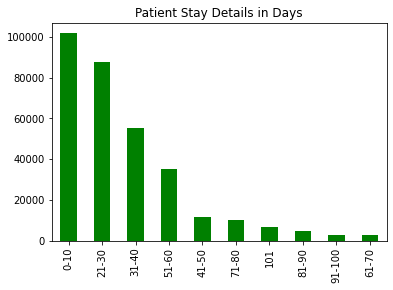

In [ ]:
train['Stay'].value_counts().plot(kind='bar',color ='green').set_title('Patient Stay Details in Days')
plt.show()

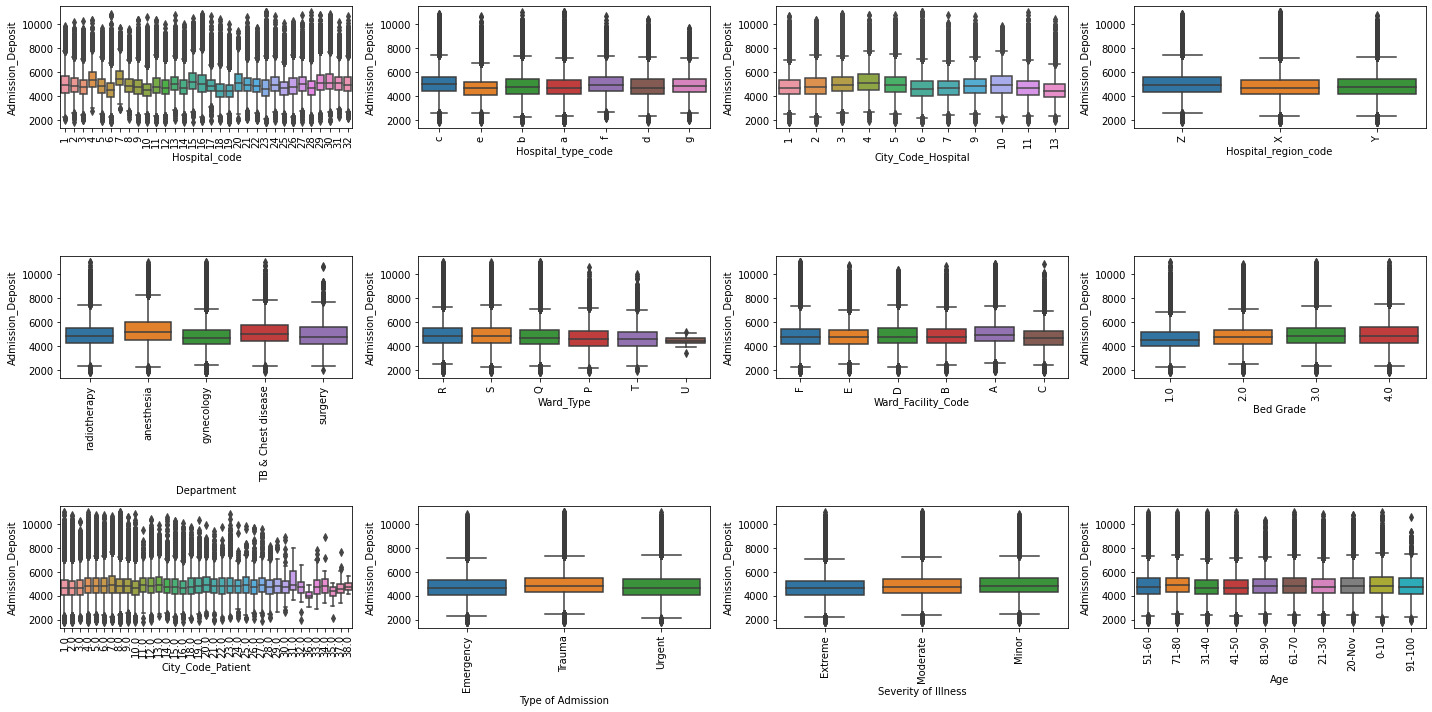

In [ ]:
fig, ax = plt.subplots(3,4, figsize=(20, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='Admission_Deposit', data=train, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

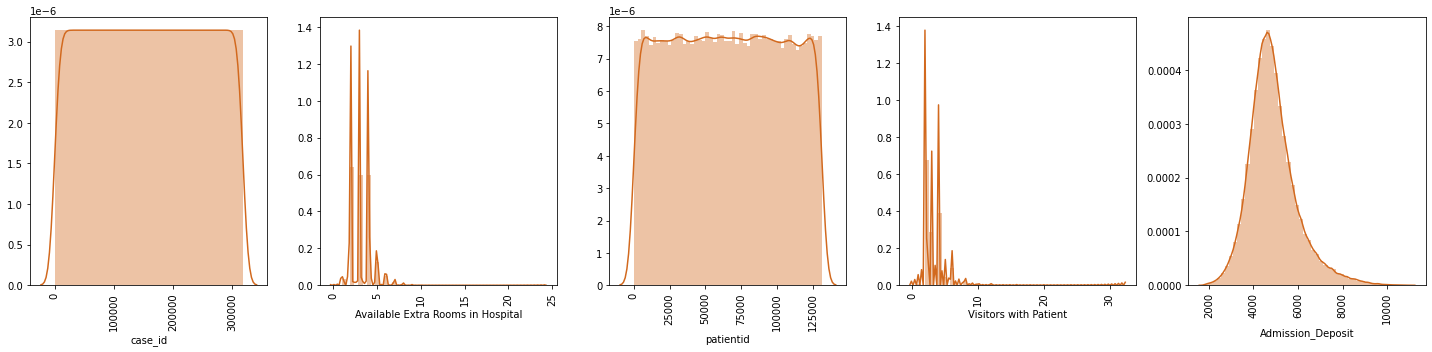

In [ ]:
numerical = train.select_dtypes(include=[int,float])
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.distplot(train[variable], ax=subplot,color='chocolate')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

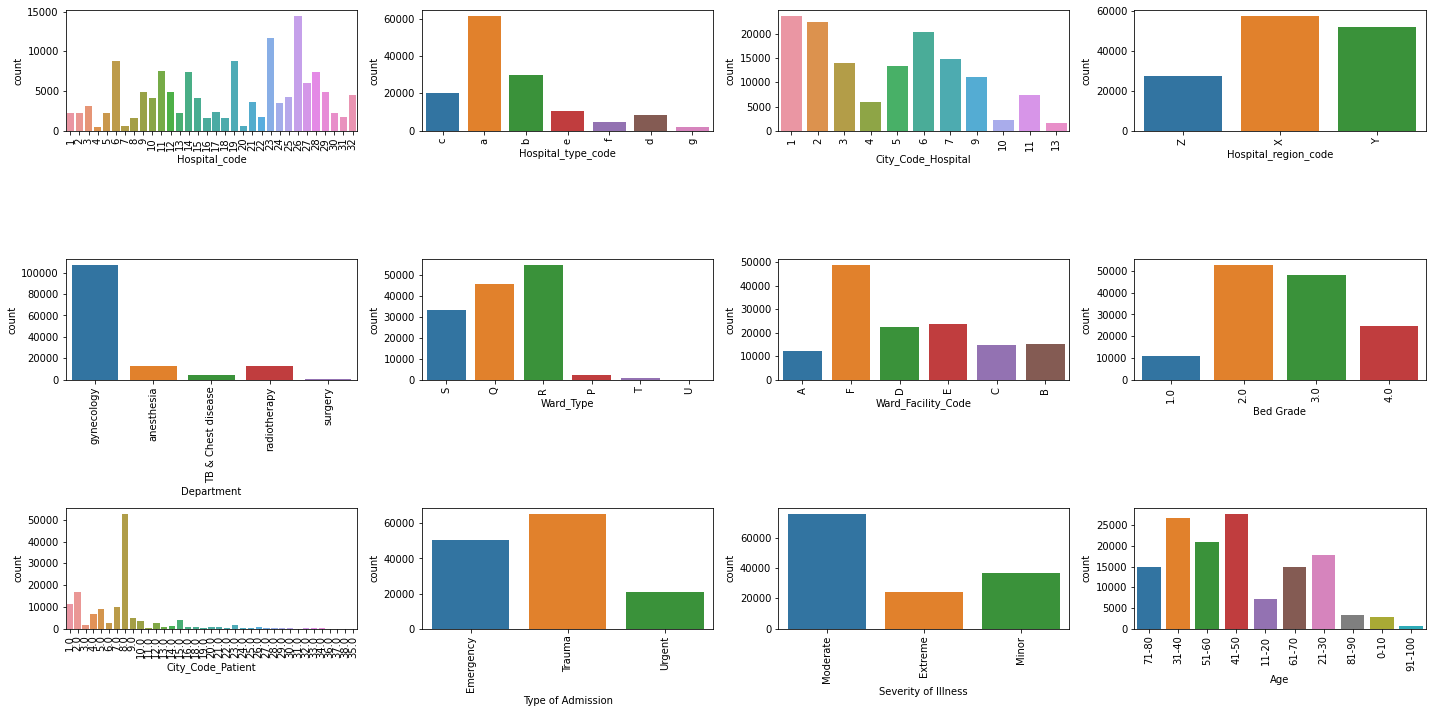

In [ ]:
categorical_test = test.select_dtypes(include=[object])
fig, ax = plt.subplots(3,4, figsize=(20, 10))
for variable, subplot in zip(categorical_test, ax.flatten()):
    sns.countplot(test[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

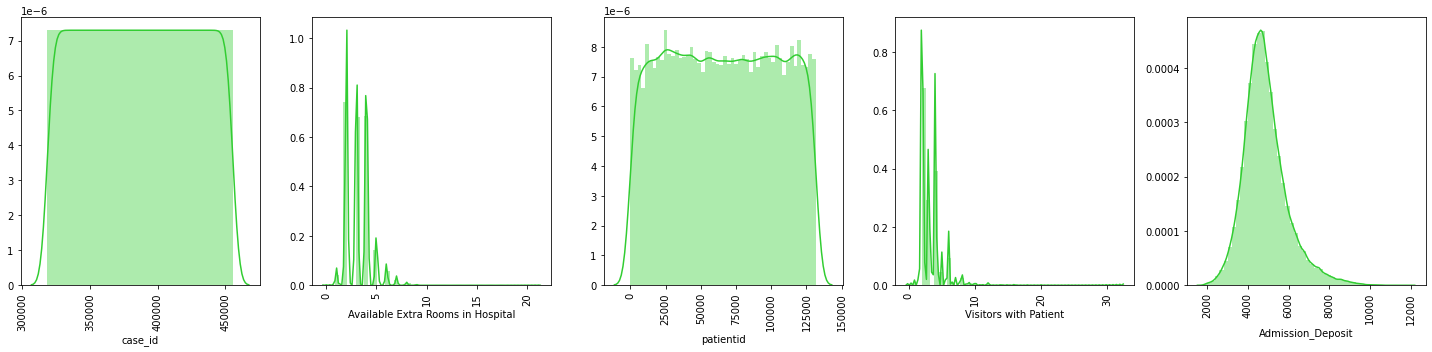

In [ ]:
numerical_test = test.select_dtypes(include=[int,float])
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for variable, subplot in zip(numerical_test, ax.flatten()):
    sns.distplot(test[variable], ax=subplot,color='limegreen')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

In [ ]:
train.Age.unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '20-Nov', '0-10', '91-100'], dtype=object)

In [ ]:
conditions  = [train.Age=='0-10', train.Age =='11-20',train.Age =='21-30',train.Age =='31-40',train.Age =='41-50',train.Age=='51-60',
               train.Age =='61-70',train.Age =='71-80', train.Age=='81-90',train.Age =='91-100']
choices     = [ 6, 16, 26,36,46,56,66,76,86,96]

train["Age"] = np.select(conditions, choices)
condition  = [test.Age=='0-10', test.Age =='11-20',test.Age =='21-30',test.Age =='31-40',test.Age =='41-50',test.Age=='51-60',
               test.Age =='61-70',test.Age =='71-80', test.Age=='81-90',test.Age =='91-100']
test['Age'] = np.select(condition, choices)


In [ ]:
conditions  = [train.Stay=='0-10', train.Stay =='11-20',train.Stay =='21-30',train.Stay =='31-40',train.Stay =='41-50',train.Stay=='51-60',
               train.Stay =='61-70',train.Stay =='71-80', train.Stay=='81-90',train.Stay =='91-100',train.Stay =='101']
choices     = [ 6, 16, 26,36,46,56,66,76,86,96,101]

train["Stay"] = np.select(conditions, choices)

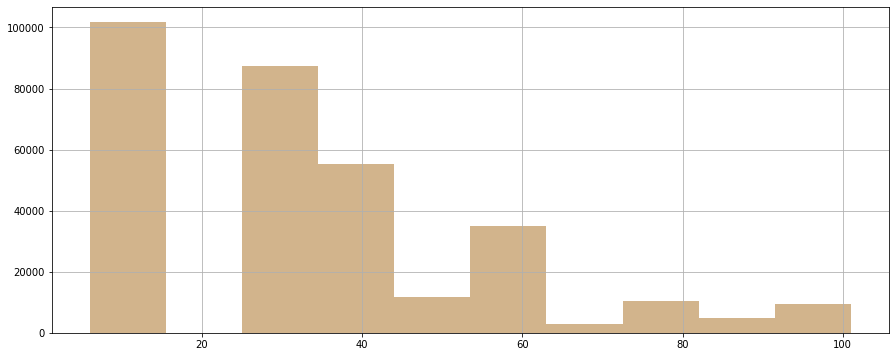

In [ ]:
train['Stay'].hist(bins=10, figsize=(15, 6),color = 'tan')

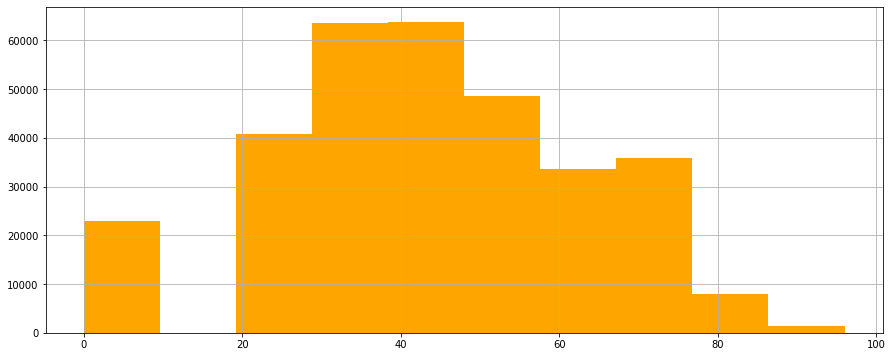

In [ ]:
train['Age'].hist(bins=10, figsize=(15, 6),color= 'orange')

Admission Deposit Skewness: 0.9314541287450879
Admission Deposit Kurtosis: 1.8550065869263443


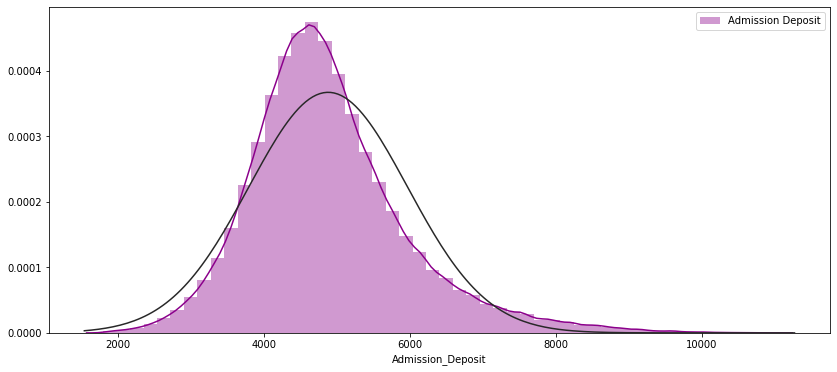

In [ ]:
from scipy.stats import norm
plt.figure(figsize=(14,6))
print('Admission Deposit Skewness:', train['Admission_Deposit'].skew())
print('Admission Deposit Kurtosis:', train['Admission_Deposit'].kurt())

sns.distplot(train['Admission_Deposit'], fit=norm, label='Admission Deposit',color='darkmagenta')
plt.legend()
plt.show()

In [ ]:
!pip install phik

     |████████████████████████████████| 604kB 2.0MB/s 


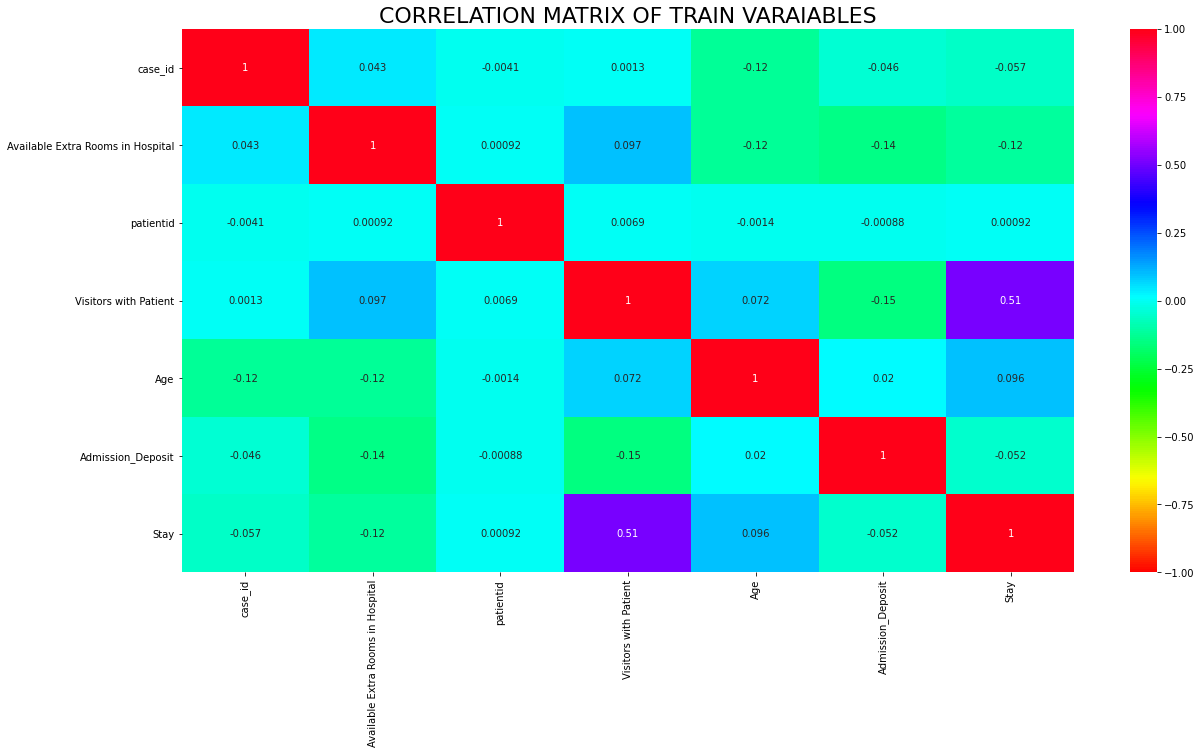

In [ ]:
import phik
from phik import resources, report
cor = train.corr()
sns.heatmap(cor,  vmax=1,vmin=-1,
        xticklabels=cor.columns,
        yticklabels=cor.columns,cmap='hsv',annot= True)
plt.title("CORRELATION MATRIX OF TRAIN VARAIABLES",fontdict={'fontsize': 22, 'fontweight': 'medium'})
plt.gcf().set_size_inches((20, 10))
plt.show()

interval columns not set, guessing: ['case_id', 'Available Extra Rooms in Hospital', 'patientid', 'Visitors with Patient', 'Age', 'Admission_Deposit', 'Stay']


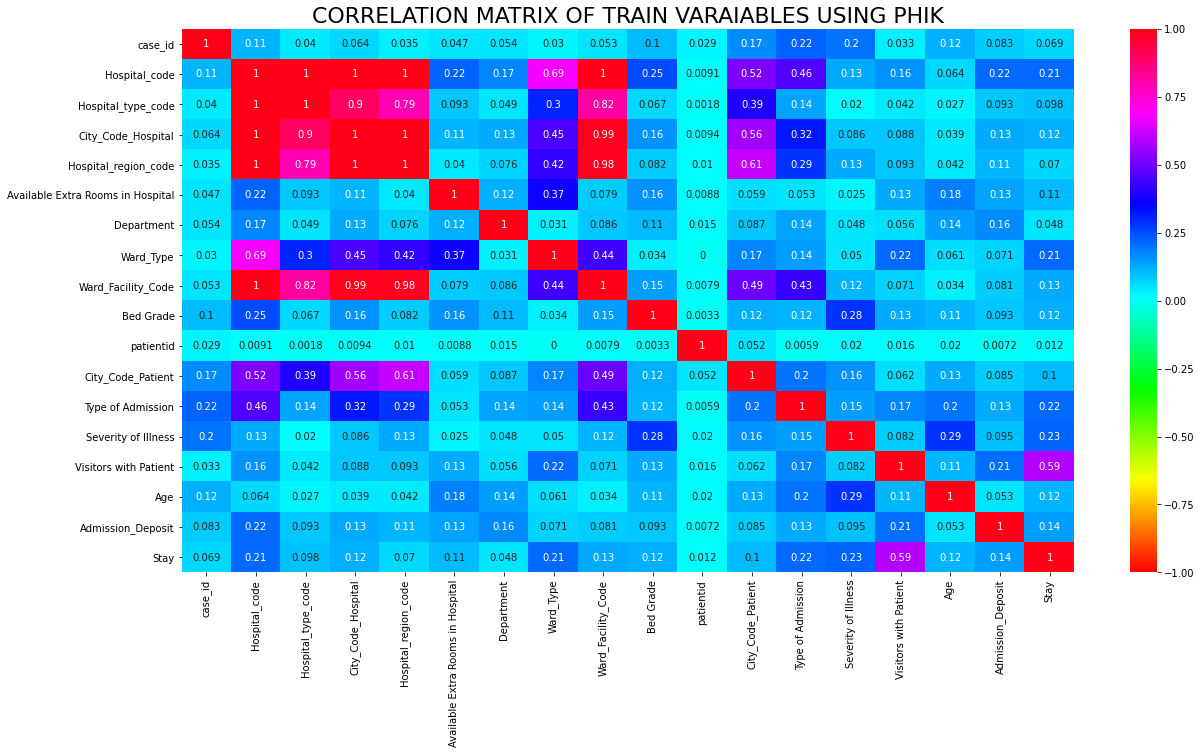

In [ ]:
corr = train.phik_matrix()
sns.heatmap(corr,  vmax=1,vmin=-1,
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap='hsv',annot= True)
plt.title("CORRELATION MATRIX OF TRAIN VARAIABLES USING PHIK",fontdict={'fontsize': 22, 'fontweight': 'medium'})
plt.gcf().set_size_inches((20, 10))
plt.show()

In [ ]:
def trimm_correlated(df_in, threshold):
    df_corr = corr
    df_not_correlated = ~(df_corr.mask(np.eye(len(df_corr), dtype=bool)).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [ ]:
train = trimm_correlated(train,0.8)
train

,case_id,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,3,radiotherapy,R,2,31397,7,Emergency,Extreme,2,56,4911,6
1,2,2,radiotherapy,S,2,31397,7,Trauma,Extreme,2,56,5954,46
2,3,2,anesthesia,S,2,31397,7,Trauma,Extreme,2,56,4745,36
3,4,2,radiotherapy,R,2,31397,7,Trauma,Extreme,2,56,7272,46
4,5,2,radiotherapy,S,2,31397,7,Trauma,Extreme,2,56,5558,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,3,radiotherapy,Q,4,86499,23,Emergency,Moderate,3,46,4144,6
318434,318435,2,anesthesia,Q,4,325,8,Urgent,Moderate,4,86,6699,36
318435,318436,3,gynecology,R,4,125235,10,Emergency,Minor,3,76,4235,6
318436,318437,3,anesthesia,Q,3,91081,8,Trauma,Minor,5,0,3761,6


interval columns not set, guessing: ['case_id', 'Available Extra Rooms in Hospital', 'patientid', 'Visitors with Patient', 'Age', 'Admission_Deposit']


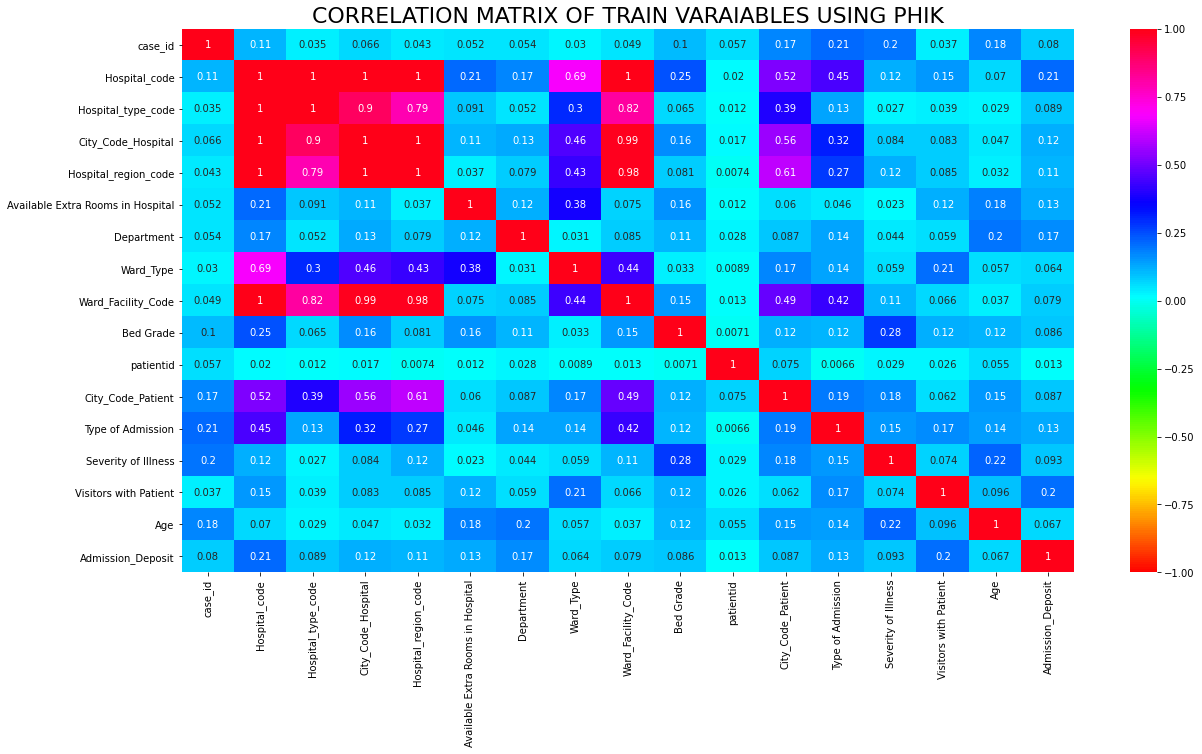

In [ ]:
corr = test.phik_matrix()
sns.heatmap(corr,  vmax=1,vmin=-1,
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap='hsv',annot= True)
plt.title("CORRELATION MATRIX OF TRAIN VARAIABLES USING PHIK",fontdict={'fontsize': 22, 'fontweight': 'medium'})
plt.gcf().set_size_inches((20, 10))
plt.show()

In [ ]:
test = trimm_correlated(test,.8)
test

,case_id,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,3,gynecology,S,2,17006,2,Emergency,Moderate,2,76,3095.0
1,318440,2,gynecology,S,2,17006,2,Trauma,Moderate,4,76,4018.0
2,318441,3,gynecology,Q,4,17006,2,Emergency,Moderate,3,76,4492.0
3,318442,3,gynecology,Q,2,17006,2,Trauma,Moderate,3,76,4173.0
4,318443,2,gynecology,R,2,17006,2,Trauma,Moderate,4,76,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,4,anesthesia,Q,3,41160,3,Emergency,Minor,4,46,6313.0
137053,455492,2,radiotherapy,R,4,30985,7,Emergency,Moderate,2,6,3510.0
137054,455493,2,anesthesia,R,4,81811,12,Urgent,Minor,2,6,7190.0
137055,455494,2,anesthesia,R,4,57021,10,Trauma,Minor,2,46,5435.0


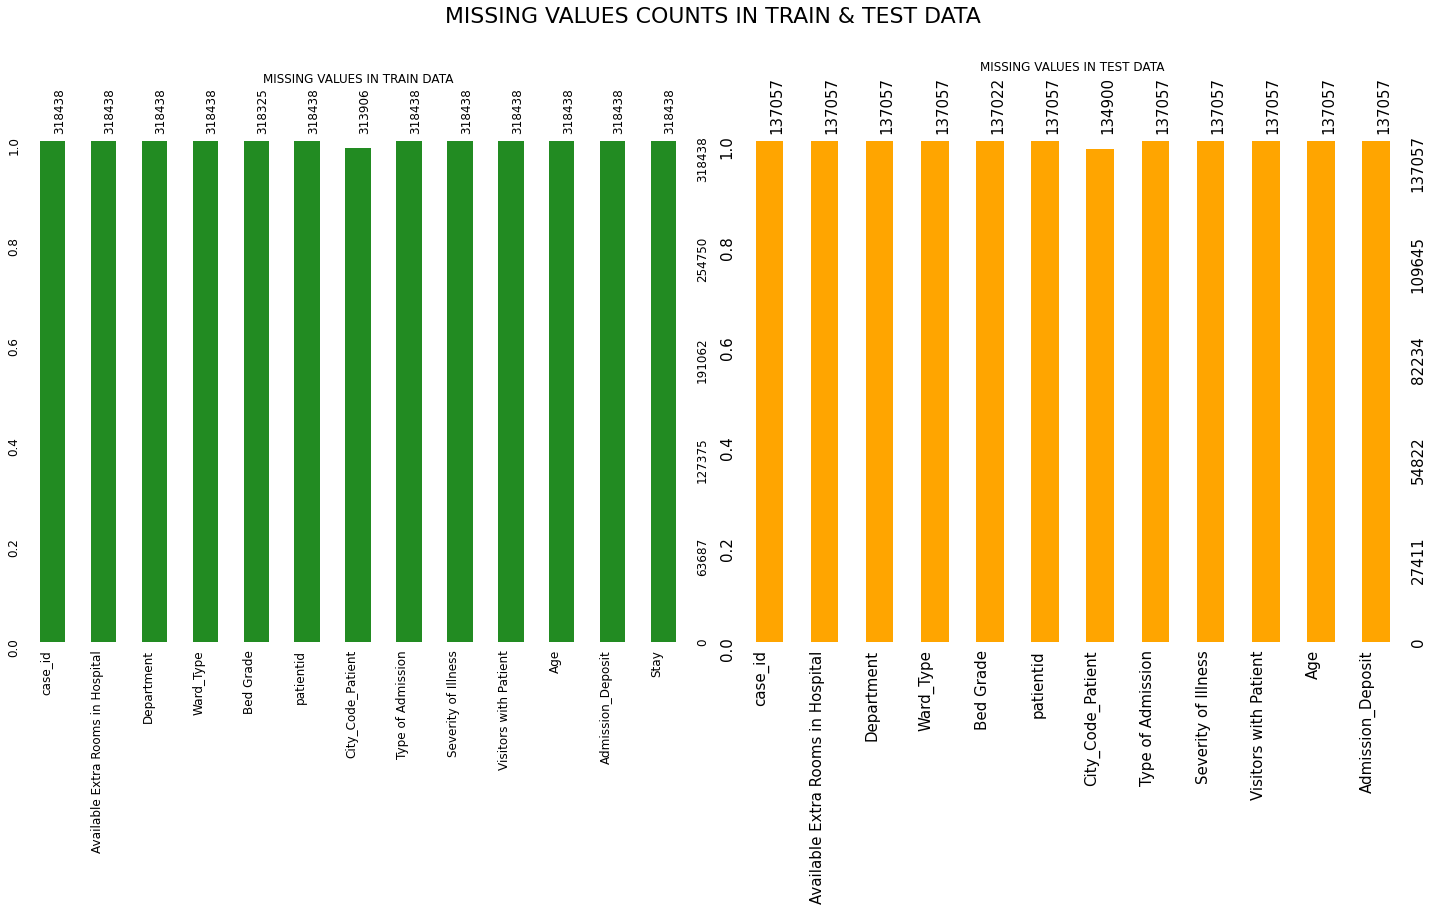

In [ ]:
import missingno as msno
f, axes = plt.subplots(1,2, figsize=(20,12))
sns.despine(left=True)

plt.suptitle('MISSING VALUES COUNTS IN TRAIN & TEST DATA ',y=1.05, fontsize=22)

ax1= msno.bar(train, fontsize=12, color='forestgreen',ax= axes[0]).set_title('MISSING VALUES IN TRAIN DATA')
ax2= msno.bar(test, fontsize=15, color='orange',ax= axes[1]).set_title('MISSING VALUES IN TEST DATA')


for ax in f.axes:
    ax.tick_params(labelrotation=90)

plt.tight_layout()
plt.show()

In [ ]:
ms_train=pd.DataFrame(train.isnull().sum(),columns=["Count_train"])
ms_train['Count_test']= test.isnull().sum()
ms_train['prop_of_missing_values_train']= train.isnull().sum()/len(train)*100
ms_train['prop_of_missing_values_test']= test.isnull().sum()/len(test)*100
ms_train

,Count_train,Count_test,prop_of_missing_values_train,prop_of_missing_values_test
case_id,0,0.0,0.000000,0.000000
Available Extra Rooms in Hospital,0,0.0,0.000000,0.000000
Department,0,0.0,0.000000,0.000000
Ward_Type,0,0.0,0.000000,0.000000
Bed Grade,113,35.0,0.035486,0.025537
patientid,0,0.0,0.000000,0.000000
City_Code_Patient,4532,2157.0,1.423197,1.573798
Type of Admission,0,0.0,0.000000,0.000000
Severity of Illness,0,0.0,0.000000,0.000000
Visitors with Patient,0,0.0,0.000000,0.000000


In [ ]:
train['Bed Grade'].fillna(5, inplace =True)
train['City_Code_Patient'].fillna(39, inplace =True)
test['Bed Grade'].fillna(5, inplace =True)
test['City_Code_Patient'].fillna(39, inplace =True)

In [ ]:
train.head()

,case_id,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,3,radiotherapy,R,2.0,31397,7.0,Emergency,Extreme,2,56,4911,6
1,2,2,radiotherapy,S,2.0,31397,7.0,Trauma,Extreme,2,56,5954,46
2,3,2,anesthesia,S,2.0,31397,7.0,Trauma,Extreme,2,56,4745,36
3,4,2,radiotherapy,R,2.0,31397,7.0,Trauma,Extreme,2,56,7272,46
4,5,2,radiotherapy,S,2.0,31397,7.0,Trauma,Extreme,2,56,5558,46


In [ ]:
train['Bed Grade'] = train['Bed Grade'].astype(int)
train['City_Code_Patient'] = train['City_Code_Patient'].astype(int)

In [ ]:
train['Admission_Deposit_sum'] = (train.groupby(['patientid']).Admission_Deposit.transform('sum')).round()
train['change_in_deposit'] = (train['Admission_Deposit_sum']/train['Admission_Deposit']).round()
test['Admission_Deposit_sum'] = (test.groupby(['patientid']).Admission_Deposit.transform('sum')).round()
test['change_in_deposit'] = (test['Admission_Deposit_sum']/train['Admission_Deposit']).round()
test

,case_id,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Admission_Deposit_sum,change_in_deposit
0,318439,3,gynecology,S,2.0,17006,2.0,Emergency,Moderate,2,76,3095.0,28765.0,6.0
1,318440,2,gynecology,S,2.0,17006,2.0,Trauma,Moderate,4,76,4018.0,28765.0,5.0
2,318441,3,gynecology,Q,4.0,17006,2.0,Emergency,Moderate,3,76,4492.0,28765.0,6.0
3,318442,3,gynecology,Q,2.0,17006,2.0,Trauma,Moderate,3,76,4173.0,28765.0,4.0
4,318443,2,gynecology,R,2.0,17006,2.0,Trauma,Moderate,4,76,4161.0,28765.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,4,anesthesia,Q,3.0,41160,3.0,Emergency,Minor,4,46,6313.0,6313.0,1.0
137053,455492,2,radiotherapy,R,4.0,30985,7.0,Emergency,Moderate,2,6,3510.0,3510.0,1.0
137054,455493,2,anesthesia,R,4.0,81811,12.0,Urgent,Minor,2,6,7190.0,7190.0,1.0
137055,455494,2,anesthesia,R,4.0,57021,10.0,Trauma,Minor,2,46,5435.0,5435.0,1.0


In [ ]:
train.drop('Admission_Deposit_sum',inplace=True,axis=1)
test.drop('Admission_Deposit_sum',inplace=True,axis=1)

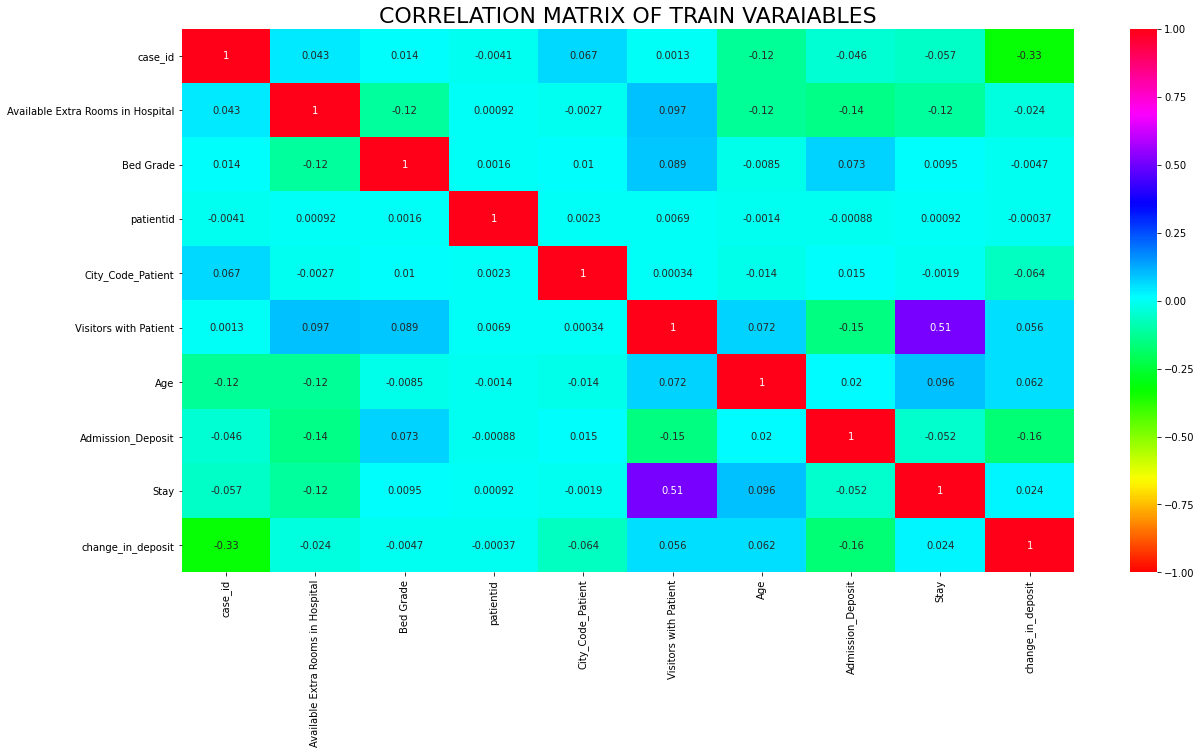

In [ ]:
cor = train.corr()
sns.heatmap(cor,  vmax=1,vmin=-1,
        xticklabels=cor.columns,
        yticklabels=cor.columns,cmap='hsv',annot= True)
plt.title("CORRELATION MATRIX OF TRAIN VARAIABLES",fontdict={'fontsize': 22, 'fontweight': 'medium'})
plt.gcf().set_size_inches((20, 10))
plt.show()

In [ ]:
train.dtypes

case_id                                int64
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Bed Grade                              int64
patientid                              int64
City_Code_Patient                      int64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                    int64
Admission_Deposit                      int64
Stay                                   int64
change_in_deposit                    float64
dtype: object

In [ ]:
cat_col = train[['Department','Ward_Type']]
cat_cols = test[['Department','Ward_Type']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for cols in cat_col:
    train[cols] = le.fit_transform(train[cols].astype(str))

print (train.info())

for cols in cat_cols:
    test[cols] = le.fit_transform(test[cols].astype(str))

print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Available Extra Rooms in Hospital  318438 non-null  int64  
 2   Department                         318438 non-null  int64  
 3   Ward_Type                          318438 non-null  int64  
 4   Bed Grade                          318438 non-null  int64  
 5   patientid                          318438 non-null  int64  
 6   City_Code_Patient                  318438 non-null  int64  
 7   Type of Admission                  318438 non-null  object 
 8   Severity of Illness                318438 non-null  object 
 9   Visitors with Patient              318438 non-null  int64  
 10  Age                                318438 non-null  int64  
 11  Admission_Deposit                  3184

In [ ]:
train = pd.get_dummies(data=train, columns=['Type of Admission', 'Severity of Illness'],drop_first=True)
test = pd.get_dummies(data=test, columns=['Type of Admission', 'Severity of Illness'],drop_first=True)


In [ ]:
train.set_index(['case_id', 'patientid'],inplace=True)
test.set_index(['case_id', 'patientid'],inplace=True)

In [ ]:
from sklearn.feature_selection import chi2
X_chi= train.drop('Stay',axis=1)
y_chi = train['Stay']
chi_scores = chi2(X_chi,y_chi)
chi_scores

(array([2.94931520e+03, 7.89167748e+01, 5.76949100e+03, 1.10959920e+03,
        9.83393482e+02, 1.00630916e+05, 2.69855280e+04, 7.45989837e+05,
        6.74184293e+03, 2.81432120e+03, 4.75907257e+02, 3.75514121e+03,
        3.30273631e+02]),
 array([0.00000000e+000, 2.65163682e-013, 0.00000000e+000, 3.93704660e-233,
        6.56464189e-206, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 8.25161797e-097, 0.00000000e+000,
        9.72854268e-066]))

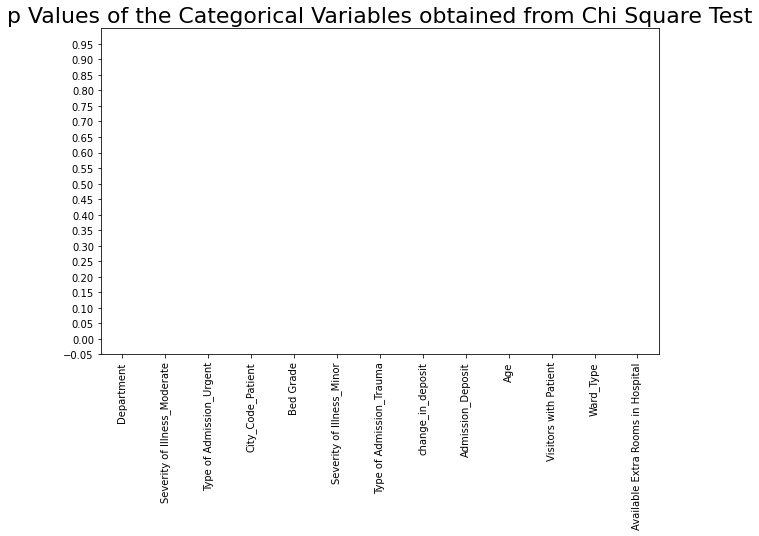

In [ ]:
p_values = pd.Series(chi_scores[1],index = X_chi.columns)
p_values.sort_values(ascending = False , inplace = True)
fig = plt.figure(figsize=(10,6))
my_colors = list('rymc')
p_values.plot.bar(color = my_colors)
plt.ylim([-.01, 1])
plt.yticks(np.arange(-.05, 1, 0.05))
plt.title('p Values of the Categorical Variables obtained from Chi Square Test',fontdict={'fontsize': 22, 'fontweight': 'medium'})
plt.show()

In [ ]:
train.head()

,,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,City_Code_Patient,Visitors with Patient,Age,Admission_Deposit,Stay,change_in_deposit,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate
case_id,patientid,,,,,,,,,,,,,,
1,31397,3,3,2,2,7,2,56,4911,6,17.0,0,0,0,0
2,31397,2,3,3,2,7,2,56,5954,46,14.0,1,0,0,0
3,31397,2,1,3,2,7,2,56,4745,36,18.0,1,0,0,0
4,31397,2,3,2,2,7,2,56,7272,46,11.0,1,0,0,0
5,31397,2,3,3,2,7,2,56,5558,46,15.0,1,0,0,0


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_names_to_normalize = ['Age', 'Admission_Deposit', 'change_in_deposit']
x = train[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = train.index)
train[['Age', 'Admission_Deposit', 'change_in_deposit']] = df_temp+10

In [ ]:
x = test[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = test.index)
test[['Age', 'Admission_Deposit', 'change_in_deposit']] = df_temp+10

In [ ]:
import xgboost as xgb
import sklearn.model_selection
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
train

,,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,City_Code_Patient,Visitors with Patient,Age,Admission_Deposit,Stay,change_in_deposit,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate
case_id,patientid,,,,,,,,,,,,,,
1,31397,3,3,2,2,7,2,10.583333,10.337858,6,10.137931,0,0,0,0
2,31397,2,3,3,2,7,2,10.583333,10.451129,46,10.112069,1,0,0,0
3,31397,2,1,3,2,7,2,10.583333,10.319831,36,10.146552,1,0,0,0
4,31397,2,3,2,2,7,2,10.583333,10.594266,46,10.086207,1,0,0,0
5,31397,2,3,3,2,7,2,10.583333,10.408123,46,10.120690,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,86499,3,3,1,4,23,3,10.479167,10.254561,6,10.000000,0,0,0,1
318435,325,2,1,1,4,8,4,10.895833,10.532037,36,10.000000,0,1,0,1
318436,125235,3,2,2,4,10,3,10.791667,10.264444,6,10.000000,0,0,1,0


In [ ]:
y = train['Stay']
X = train.drop('Stay',axis=1)

In [ ]:
# 10 percent of dataset is used for test and 90 percent for model training

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import sklearn.metrics as metrics

In [ ]:
xgb =XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, n_estimators=2400,
             n_jobs=1, nthread=None, objective='reg:linear',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)


lgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=12000, 
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.4, 
                                       )

In [ ]:
#Fitting
xgb.fit(x_train, y_train)
lgbm.fit(x_train, y_train,eval_metric='accuracy')

[05:50:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.4, importance_type='split', learning_rate=0.01,
              max_bin=200, max_depth=-1, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=12000,
              n_jobs=-1, num_leaves=4, objective='regression',
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
from sklearn.metrics import accuracy_score
predict1 = xgb.predict(x_test)
predict = lgbm.predict(x_test)


In [ ]:
import math
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, predict1))))
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, predict))))

Root Mean Square Error test = 17.39089152664948
Root Mean Square Error test = 17.4868269705452


In [ ]:
predict1

array([23.672749, 49.205513, 27.59764 , ..., 20.578617, 15.37593 ,
       23.8188  ], dtype=float32)

In [ ]:
xgb.fit(X, y)
lgbm.fit(X, y,eval_metric='rmse')

[05:57:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.4, importance_type='split', learning_rate=0.01,
              max_bin=200, max_depth=-1, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=12000,
              n_jobs=-1, num_leaves=4, objective='regression',
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
predict4 = lgbm.predict(test)
predict3 = xgb.predict(test)
predict_y = ( predict3*0.55 + predict4 * 0.45)

In [ ]:
predict_y

array([20.48255805, 53.56873743, 14.39988175, ..., 13.83103891,
       13.96317656, 53.07390375])

In [ ]:
submission = pd.DataFrame({"Stay": predict_y})
submission.to_csv('submission.csv', index=False)

In [ ]:
submission

,Stay
0,20.482558
1,53.568737
2,14.399882
3,24.663519
4,48.736409
...,...
137052,21.958676
137053,17.895982
137054,13.831039
137055,13.963177


In [ ]:
conditions  = [submission.Stay <10, submission.Stay < 20,submission.Stay < 30,submission.Stay < 40,submission.Stay < 50,
               submission.Stay < 60,submission.Stay <= 70,submission.Stay <= 80,submission.Stay <= 90,submission.Stay <= 100,submission.Stay <= 120]
choices     = [ "0-10", '11-20', '21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','More than 100 Days']

submission["Stay_md"] = np.select(conditions, choices)

In [ ]:
submission.head(9)

,Stay,Stay_md
0,20.482558,21-30
1,53.568737,51-60
2,14.399882,11-20
3,24.663519,21-30
4,48.736409,41-50
5,22.061488,21-30
6,23.499644,21-30
7,15.745296,11-20
8,20.615723,21-30


In [ ]:
submission.to_csv('/content/drive/My Drive/healthhackav/xgb_lgb3.csv')

In [ ]:
submission.Stay_md.unique()

array(['21-30', '51-60', '11-20', '41-50', '31-40', '71-80', '81-90',
       '0-10', '91-100', '61-70', 'More than 100 Days'], dtype=object)

In [ ]:
submission.Stay.max()

119.30350905651412